In [3]:
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\rahman\appdata\local\programs\python\python312\lib\site-packages (2.1.4)




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/9.1 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.2/9.1 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.1 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.1 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.1 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.1 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.1 MB 2.5 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.1 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.2/9.1 MB 2.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.1 MB 2.6 MB/s eta 0:00:04
   ------ ----------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
data = pd.read_csv(r'F:\Projects\New folder\linear_regression\data_set.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1084 non-null   object
 1   Price     1084 non-null   object
 2   Open      1084 non-null   object
 3   High      1084 non-null   object
 4   Low       1084 non-null   object
 5   Vol.      1084 non-null   object
 6   Change %  1084 non-null   object
dtypes: object(7)
memory usage: 59.4+ KB


In [6]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [7]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/09/2021,"40,093.5","40,573.4","41,125.0","39,449.1",0.15K,-1.18%
1,01/08/2021,"40,573.4","39,429.5","41,226.2","37,951.6",0.31K,2.90%
2,01/07/2021,"39,429.5","36,716.5","39,429.5","36,716.5",0.28K,7.39%
3,01/06/2021,"36,716.5","33,942.1","36,716.5","33,808.0",0.29K,8.17%
4,01/05/2021,"33,942.1","32,000.0","33,942.1","30,940.8",0.25K,6.14%


In [134]:
data=data.replace(',','',regex=True)

In [160]:
temp=data[['Vol.']]

In [161]:
temp.head()

,Vol.
0,0.15
1,0.31
2,0.28
3,0.29
4,0.25


In [183]:
temp=np.asarray(data['Vol.'])
temp=np.asarray([float(z)*1000 for z in temp])

In [185]:
data['Vol.']=temp

In [193]:
x=data[['Open','Price','High','Low','Vol.']]
y=data['Change %']



In [194]:
temp=y
y=np.where(data['Change %'].shift(-1)>data['Change %'],1,0)

In [195]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [197]:

y=pd.DataFrame(y,columns=['Change'])

In [198]:
y

,Change
0,1
1,1
2,1
3,0
4,0
...,...
1079,1
1080,1
1081,0
1082,0


In [199]:
print(x,"\t",y)

         Open    Price     High      Low   Vol.
0     40573.4  40093.5  41125.0  39449.1  150.0
1     39429.5  40573.4  41226.2  37951.6  310.0
2     36716.5  39429.5  39429.5  36716.5  280.0
3     33942.1  36716.5  36716.5  33808.0  290.0
4     32000.0  33942.1  33942.1  30940.8  250.0
...       ...      ...      ...      ...    ...
1079  11255.7  10998.6  11579.2   9823.5   60.0
1080  11240.0  11255.7  11750.0  11000.0   50.0
1081  10818.0  11240.0  12114.0  10509.8   60.0
1082  10695.0  10799.0  11928.0  10000.0   60.0
1083  11357.7  10695.0  12830.0  10113.5   60.0

[1084 rows x 5 columns] 	       Change
0          1
1          1
2          1
3          0
4          0
...      ...
1079       1
1080       1
1081       0
1082       0
1083       0

[1084 rows x 1 columns]


In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=LinearRegression()

In [201]:
model.fit(x_train,y_train)

LinearRegression()

In [202]:
prediction=model.predict(x_test)

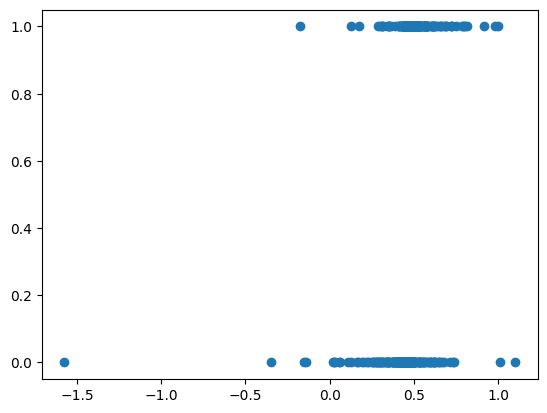

In [203]:
plt.scatter(prediction,y_test)

In [204]:
metrics.mean_absolute_error(y_test, prediction)

0.46025799134800494

In [205]:
metrics.mean_squared_error(y_test, prediction)

0.23691702985007476

In [206]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

0.48674123500076993